<a href="https://colab.research.google.com/github/waibazen/Customer_Churn_modeling/blob/master/Customer_Churn__Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**


1.   what are the leading indicators of Customers Churn for the company?
2.   what is important and urgent for the company,interms of investing resources towards specific Customer segment or Customers that might leave the company and (loss of revenue) so that management can strategize based on prediction model?Assuming that the company wants to focus on customers who are going to churn in recent time and rather invest heavily on  these customers and retain them(saving revenue and good chunk of profit margin ) ?
3.   how are the performance metrics based on different sampling techniques employed on the imbalanced class dataset?







In [190]:
#let's import liraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [191]:
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df=pd.read_csv('/Churn_Modelling.csv')
df.info()

data=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [192]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [193]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [194]:
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**HEAT MAP**

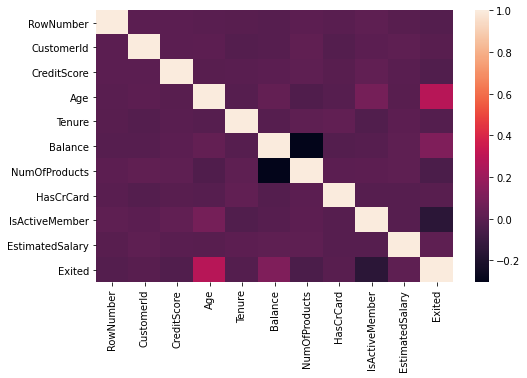

In [196]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.select_dtypes(include='number').corr());

Age and Balance are the topmost correlated factors with Exited :target variable,however are not so significant

In [197]:
data_num=data.select_dtypes(include=['float64','int64'])

In [198]:
data_num.columns.values

array(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'], dtype=object)

LET'S LOOK AT DISTRIBUTION VIA HISTOGRAMS

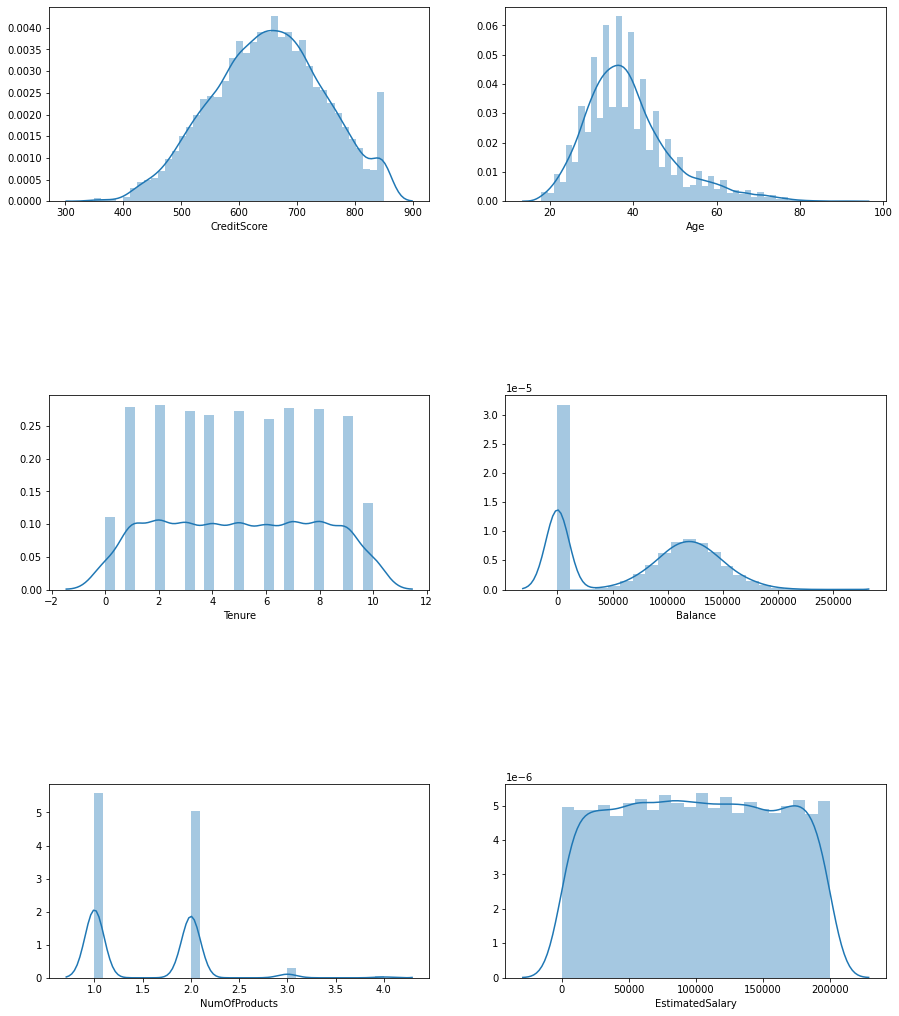

In [204]:

cat=[ 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary']

fig=plt.subplots(figsize=(15,25))
for i,col in enumerate(cat):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)    
    ax = sns.distplot(data[col])
    plt.xticks(rotation=0)
    
    


normalization for non-guassian-like distribution (EstimatedSalary,NumofProducts,Tenure,Balance)and standardization for guassian like distribution.(credit Score/Age)

In [43]:
#looking at target variable'Exited'
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**clearly imbalanced class labels**


In [152]:
# check for missing values
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df=data.copy()


In [45]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df.columns.values


array(['Surname', 'Geography', 'Gender'], dtype=object)

In [46]:
obj_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

since Geography is nominal but cardinality is less let's use one hot encoding

In [47]:
obj_df['Surname'].value_counts()

Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Learmonth     1
McCaffrey     1
Fokina        1
Morton        1
Diehl         1
Name: Surname, Length: 2932, dtype: int64

**Clearly,col Surname is nominal and has over 2932 cardinalities so (no memory problem) and hence can be used binary encoding

In [23]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.1MB/s 


In [48]:
 
 # using binary encoding 
 import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['Surname'])
dfbin=encoder.fit_transform(obj_df['Surname'])
df=pd.concat([df,dfbin],axis=1)

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,Surname_12
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [50]:
#using hot encoding for these nominal variables
df = pd.get_dummies(df,columns=['Geography','Gender'] )
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,Surname_12,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0


In [52]:
df=df.drop(['Surname'],axis=1)

In [53]:
df.columns.values

array(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Surname_0', 'Surname_1', 'Surname_2',
       'Surname_3', 'Surname_4', 'Surname_5', 'Surname_6', 'Surname_7',
       'Surname_8', 'Surname_9', 'Surname_10', 'Surname_11', 'Surname_12',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Surname_0          10000 non-null  int64  
 12  Surname_1          10000 non-null  int64  
 13  Surname_2          10000 non-null  int64  
 14  Surname_3          10000 non-null  int64  
 15  Surname_4          10000 non-null  int64  
 16  Surname_5          1000

In [107]:
df=df.drop(['RowNumber','CustomerId'],axis=1)

In [108]:
print(df.Exited.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


either use over sampling to mitigate the imbalanced data set or under sample,use SMOTE

In [205]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,Surname_12,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.0,0.110400,0.252800,0.391600,0.438700,0.450900,0.485200,0.493900,0.495800,0.508200,0.490900,0.522600,0.503300,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.0,0.313403,0.434639,0.488132,0.496253,0.497608,0.499806,0.499988,0.500007,0.499958,0.499942,0.499514,0.500014,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


LETS USE OVER SAMPLING

In [109]:
from sklearn.utils import resample

# Separate input features and target
y = df.Exited
X = df.drop('Exited', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.Exited==0]
churn= X[X.Exited==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.Exited.value_counts()
    1    213245
    0    213245

In [110]:
# separate minority and majority classes
not_churn = X[X.Exited==0]
churn= X[X.Exited==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.Exited.value_counts()
    

1    5975
0    5975
Name: Exited, dtype: int64

In [111]:
upsampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_0,Surname_1,Surname_2,Surname_3,Surname_4,Surname_5,Surname_6,Surname_7,Surname_8,Surname_9,Surname_10,Surname_11,Surname_12,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
1470,568,31,1,61592.14,2,1,1,61796.64,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0
8491,651,42,2,143145.87,2,1,0,43612.06,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0
9706,512,30,6,0.00,2,1,0,88827.31,0,0,0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,0,0
147,650,37,5,106967.18,1,0,0,24495.03,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0
3267,707,40,3,109628.44,1,1,0,189366.03,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0


In [112]:
upsampled.columns.values

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Surname_0',
       'Surname_1', 'Surname_2', 'Surname_3', 'Surname_4', 'Surname_5',
       'Surname_6', 'Surname_7', 'Surname_8', 'Surname_9', 'Surname_10',
       'Surname_11', 'Surname_12', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female',
       'Gender_Male', 'Exited'], dtype=object)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [114]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Exited
X_train = upsampled.drop('Exited', axis=1)



In [115]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# Checking accuracy
accuracy_score(y_test, upsampled_pred)
   
    
# f1 score
f1_score(y_test, upsampled_pred)
   
 #recall score   
recall_score(y_test, upsampled_pred)
   

0.689453125

In [116]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
print(classification_report(y_test, logreg.predict(X_test)))

Logistic regression accuracy: 0.650
              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1988
           1       0.33      0.69      0.45       512

    accuracy                           0.65      2500
   macro avg       0.61      0.66      0.60      2500
weighted avg       0.77      0.65      0.68      2500



In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1988
           1       0.72      0.52      0.60       512

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



Surname_0-0.00%
Surname_1-0.93%
Geography_Spain-1.00%
Gender_Male-1.04%
Gender_Female-1.07%
Geography_France-1.27%
Surname_2-1.48%
HasCrCard-1.53%
Surname_12-1.60%
Surname_9-1.61%
Surname_10-1.64%
Surname_6-1.66%
Surname_4-1.66%
Surname_3-1.69%
Surname_8-1.69%
Surname_11-1.73%
Surname_7-1.74%
Surname_5-1.77%
Geography_Germany-2.36%
IsActiveMember-3.44%
Tenure-6.12%
CreditScore-9.31%
EstimatedSalary-9.81%
Balance-10.45%
NumOfProducts-10.88%
Age-22.51%


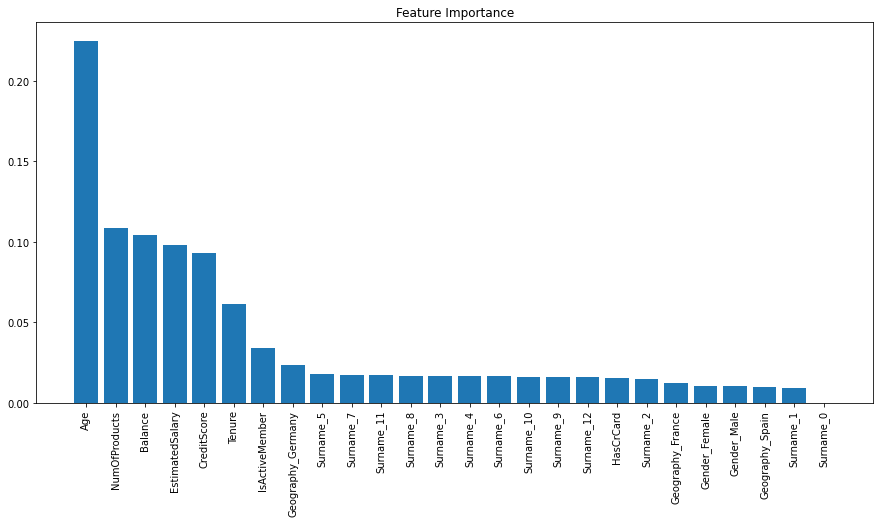

In [118]:


feature_labels = np.array([ 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Surname_0', 'Surname_1', 'Surname_2',
       'Surname_3', 'Surname_4', 'Surname_5', 'Surname_6', 'Surname_7',
       'Surname_8', 'Surname_9', 'Surname_10', 'Surname_11', 'Surname_12',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Exited'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    
    
   
indices = np.argsort(importance)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importance[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    

In [119]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

# fit the data
xgb.fit(X_train, y_train)

# Get predictions
xgb_preds = xgb.predict(X_test)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1988
           1       0.72      0.52      0.60       512

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



In [124]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_churn_downsampled, churn])

# checking counts
downsampled.Exited.value_counts()

1    1525
0    1525
Name: Exited, dtype: int64

In [125]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Exited
X_train = downsampled.drop('Exited', axis=1)

logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = logreg.predict(X_test)


In [126]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1988
           1       0.33      0.69      0.45       512

    accuracy                           0.65      2500
   macro avg       0.61      0.67      0.60      2500
weighted avg       0.78      0.65      0.69      2500



In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1988
           1       0.47      0.77      0.58       512

    accuracy                           0.77      2500
   macro avg       0.70      0.77      0.71      2500
weighted avg       0.83      0.77      0.79      2500



Using Synthetic datapoints,Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [176]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Exited
X = df.drop('Exited', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [177]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

In [178]:
print(classification_report(y_test, smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.65      0.76      1988
           1       0.34      0.69      0.46       512

    accuracy                           0.66      2500
   macro avg       0.62      0.67      0.61      2500
weighted avg       0.78      0.66      0.69      2500



#Random Forest outpaced OTHER algorithms in terms of higher precision,recall & f-score in all the settings but while oversampling our precision was best as we'd rather focus on calling out as precisely as we can to predict positive class than negative class by saving companies time and resources only on customer who are likely to churn (and at least spending extra money on  customers who would have stayed anyways)
